In [120]:
import pandas as pd
from io import StringIO
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import minimize
rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

def odd(x):
    if x % 2 == 0:
        return -1
    elif x % 2 == 1:
        return 1
    else:
        return 0


In [121]:
data_5 = """
t/ms	amplititude/V
-0.88	2.28
-0.2	0.44
0.21	0.04
0.5	0
0.78	-0.02
1	-0.04
"""

data_1 = """
t/ms	amplititude/V
1.48	1.72
1.89	0.68
2.2	0.28
2.48	0.12
2.73	0.08
2.97	0.02
"""

data_05 = """
t/ms	amplititude/V
1.93	0.404
2.34	0.248
2.68	0.184
2.97	0.124
3.24	0.116
3.5	0.068
"""
data_005 = """
t/ms	amplititude/V
0.43	0.76
0.81	0.36
1.13	0.24
1.39	0.14
1.62	0.1
1.82	0.08
"""

data_0 = """
t/ms	amplititude/V
0.027	0.28
0.69	0.188
1	0.108
1.26	0.072
1.48	0.04
1.68	0.036
"""



# 使用 StringIO 将字符串转换为类似文件的对象，并将数据读入 Pandas DataFrame 中
data_io_5 = StringIO(data_5)
df_5 = pd.read_csv(data_io_5, sep="\t")

data_io_1 = StringIO(data_1)
df_1 = pd.read_csv(data_io_1, sep="\t")

data_io_05 = StringIO(data_05)
df_05 = pd.read_csv(data_io_05, sep="\t")

data_io_005 = StringIO(data_005)
df_005 = pd.read_csv(data_io_005, sep="\t")

data_io_0 = StringIO(data_0)
df_0 = pd.read_csv(data_io_0, sep="\t")

data_io_hf = StringIO(data_hf)
df_hf = pd.read_csv(data_io_hf, sep="\t")

dfs = [df_0, df_005, df_05, df_1, df_5]


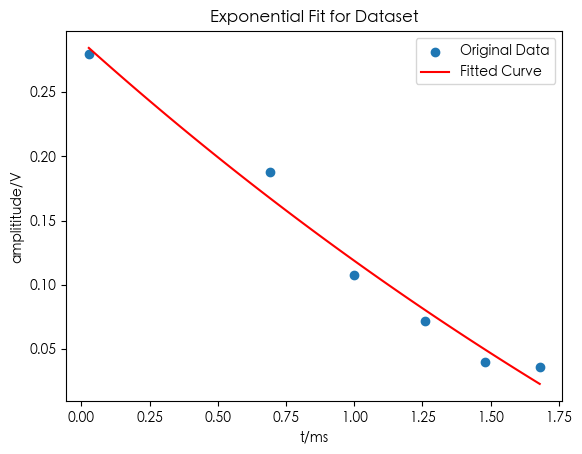

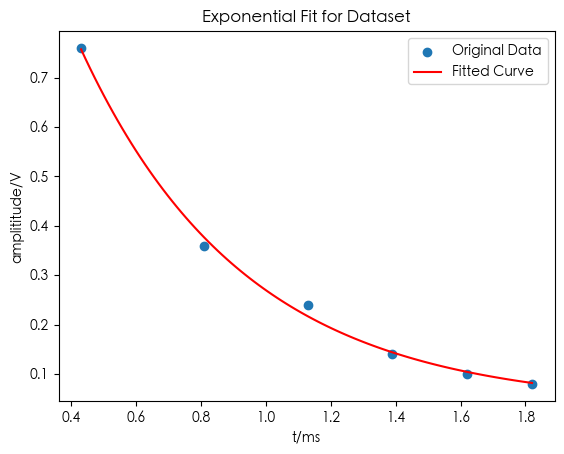

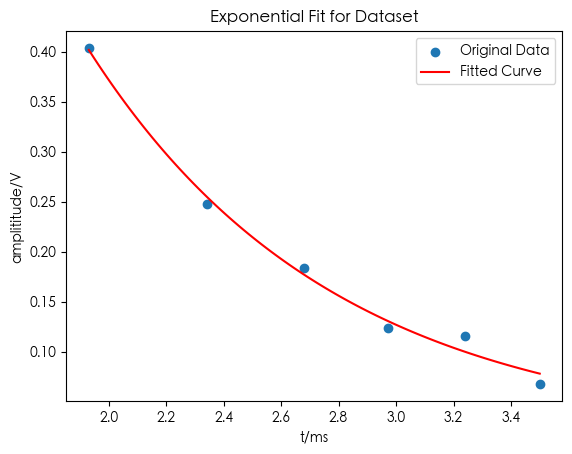

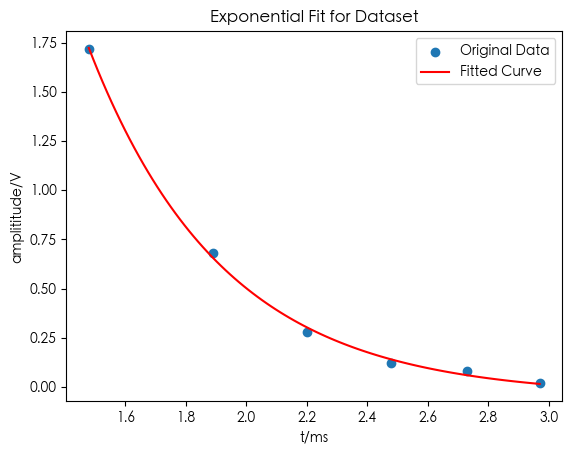

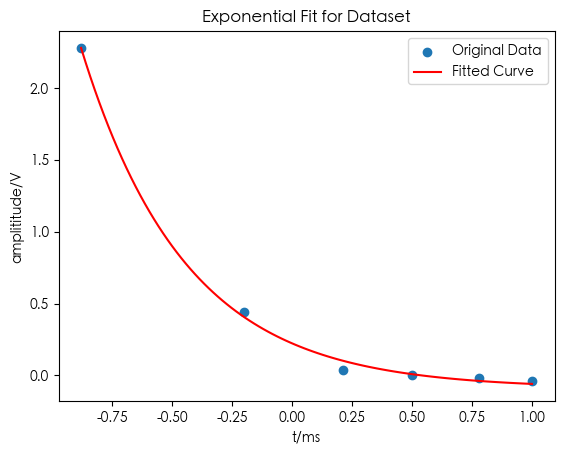

Dataset 1 Fit Parameters: a=0.841871723153613, b=4.411915476834488, c=-0.5523002806298207
Dataset 2 Fit Parameters: a=1.6878221963464193, b=0.5059224277111678, c=0.035703817225517936
Dataset 3 Fit Parameters: a=3.6705167121051643, b=0.8561836079606708, c=0.016719996831580163
Dataset 4 Fit Parameters: a=49.56443075000399, b=0.4441290084394507, c=-0.04615811683868785
Dataset 5 Fit Parameters: a=0.3142111251181771, b=0.4351720553997278, c=-0.09146167978296439


In [123]:
# 定义指数函数
def exp_func(x, a, b, c):
    return a * np.exp(-x/b) + c

# 对所有 df 进行指数函数拟合
fit_results = []

for df in dfs:
    x_data = df['t/ms']
    y_data = df['amplititude/V']
    
    # 设置拟合初始值
    initial_guess = [1, 1, 1]
    # 使用 curve_fit 进行拟合
    popt, pcov = curve_fit(exp_func, x_data, y_data,maxfev=100000, p0=initial_guess)
    
    # 保存拟合结果
    fit_results.append((popt, pcov))
    
    # 绘制拟合曲线
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = exp_func(x_fit, *popt)
    
    plt.figure()
    plt.scatter(x_data, y_data, label='Original Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.title(f'Exponential Fit for Dataset')
    plt.xlabel('t/ms')
    plt.ylabel('amplititude/V')
    plt.legend()
    plt.show()

tau = []
# 打印拟合参数
for i, (popt, pcov) in enumerate(fit_results):
    tau.append(popt[1])
    print(f'Dataset {i+1} Fit Parameters: a={popt[0]}, b={popt[1]}, c={popt[2]}')

density = [0, 0.05, 0.5, 1, 5]

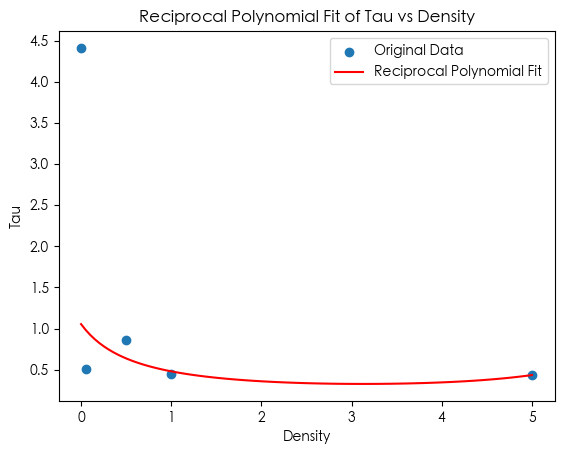

In [130]:
# 使用 numpy.polyfit 进行倒数多项式拟合
reciprocal_tau = 1 / np.array(tau)
coefficients = np.polyfit(density, reciprocal_tau, 2)  # 1 表示一次多项式
polynomial = np.poly1d(coefficients)

# 生成拟合曲线的 x 轴数据
x_fit = np.linspace(min(density), max(density), 100)
y_fit = 1 / polynomial(x_fit)

# 绘制拟合曲线
plt.figure()
plt.scatter(density, tau, label='Original Data')
plt.plot(x_fit, y_fit, label='Reciprocal Polynomial Fit', color='red')
plt.title('Reciprocal Polynomial Fit of Tau vs Density')
plt.xlabel('Density')
plt.ylabel('Tau')
plt.legend()
plt.show()